In [ ]:
"""
Savva Krasnokutskii
Bachaleor thesis
Progress log 3
"""

In [ ]:
"""
Part 1 Introduction to the Genome
When moving between theoretiucal concept provided in first 2 logs towards the practical implementation I have envountered a new set
of problems and chalendges, which were expected, but took singificantly more time to solve then anticipated. In this progress log I am
going to build a practical implementation of genome which would be used in our model. 

At first let us build a simulation of hypothetical genome for sexual and assexual reproduction. Where in first the genome of an offpring
is a mixed genome of parents, and in the later the genome of the offspring just (mutated) genome of previous creature.
"""

In [124]:
#let us start with the nessesary imports
import random
import string
from typing import List, Tuple
import matplotlib.pyplot as plt

In [4]:
"""
For now since we do not have an enviroment yet, let us view a genome just as a n-length string of alphabet characters. For example "abcdefg"
Where the adaptability would be judged by the genome profimity to the ideal genome, an arbitrary defined string. This would be very usefull
During the inital research to look at the different trends present. Also the point of the simulation would be to confirm the information I have
reseacrhed is correct.

Let us set n to 50. The number is large enought to offset stochaistic fluntuations, but not to big to slow the simulation down.
"""

#def generate_random_genome(n):
    #return ''.join(random.choices(string.ascii_lowercase, k=n))

#This code would be used to generate starting creatures
print(generate_random_genome(50))

zlcfuocrhlqvqlfbkfthyzcdolbkkyqrsmicfbldofmzahhztb


In [9]:
#let us create an "ideal" enviromental genome. For now static
ideal_genome = "agenomewhichwouldmaximizethechancestomakeoffspring"
print(len(ideal_genome))

50


In [282]:
def set_ideal_genome(genome:str, mutation_chance:float) -> str:
    new_genome = ""

    for el in genome:
        if (random.random() < mutation_chance):
            new_genome+=random.choice(string.ascii_lowercase)
        else:
            new_genome+=el    
    
    return new_genome
    
def get_ideal_genome() -> str:
    return ideal_genome

def generate_random_genome(n:int) -> str:
    return ''.join(random.choices(string.ascii_lowercase, k=n))
    
def initialize_creatures(number_of_creatures:int, genome_length:int) -> List[str]:
    """
    This method given number of creatures to be made and genome length. Generates the said number of creatures
    With genome of specified length.
    """
    creatures = []
    
    for i in range(number_of_creatures):
        creatures.append(generate_random_genome(genome_length))

    return creatures

def calculate_adaptability(creature_genome:str,ideal_genome:str = get_ideal_genome()) -> int:
    """
    Given a creature genome and the ideal's genome this methods counts how many characters on same 
    positions equal to each other and returns adaptability score, which equals matching characters

    We assume len(creature_genome) = len(ideal_genome)
    """
    genome_length = len(creature_genome)
    matching_characters = 0

    for i in range(genome_length):
        if (creature_genome[i] == ideal_genome[i]):
            matching_characters += 1
    
    return matching_characters

def determine_assexual_winners(creatures_adaptabilities:List[Tuple], normalizer_offset:float = 1.0) -> List[int]:
    """
    Given the list of adaptabilities we need to determine which of the creatures get to create copies of themselves and which do not
    For reaslism it would have probabilistics basics, since even the unadaptable sometimes would have a chance. Also we shall 'normalize'
    the probabilities by subtracting from minimal value. What is returned as a binary list of 1s and 0s, where 1 means creature gets to clone intself

    The selection procces is more complex. Imagine we have adaptabilities. 1 2 3 4. We sum them. Result is 10. We choose random float from 0 to 10
    Let us say we chose 4.23 we see to which value it corresponds. 1 < 4.23 1+2 = 3 < 4.23 1+2+3 = 6 > 4.23 We chose 3 as survivor number one our output
    Moves from [0,0,0,0] to [0,0,1,0] -> Now we set 3rd adatabilty to 0 as we no loinger should select it 1 2 0 4 and continue the procces for n numer of steps

    P.S Important to update the sum each time.
    """
    results = [0]*len(creatures_adaptabilities)
    
    if (min(creatures_adaptabilities) == 0):
        partical_min_normalizer = min(creatures_adaptabilities)
    else:
        partical_min_normalizer = min(creatures_adaptabilities) - 1

    for i in range(len(creatures_adaptabilities)):
        creatures_adaptabilities[i] = creatures_adaptabilities[i] - int(partical_min_normalizer*normalizer_offset)

    adaptabilities_sum = sum(creatures_adaptabilities)

    for i in range(len(creatures_adaptabilities)//2):
        chosen_number = random.random()*adaptabilities_sum

        temp_sum = 0
        counter = 0
        
        for counter in range(len(creatures_adaptabilities)):
            temp_sum += creatures_adaptabilities[counter]
            if (temp_sum > chosen_number):
                break
            counter+=1
        
        creatures_adaptabilities[counter] = 0
        results[counter] = 1
        adaptabilities_sum = sum(creatures_adaptabilities)

        
    return results

def mutate_genome(genome:str, mutation_chance:float, mutation_type:int) -> str:
    """
    Iterates throw the genome. 
    Type A mutation
    With set chance change one element of a genome
    Type B mutation
    Go element by element, change the element with a set chance.
    Giving any other mutation value just disables mutation entirely, which would be usefull to us later.
    """
    if (mutation_type == 0):
        if (random.random() < mutation_chance):
            random_index = random.randint(0, len(genome) - 1)
            new_genome = genome[:random_index] + random.choice(string.ascii_lowercase) + genome[random_index+1:]
            
            return new_genome
        else:
            return genome
    elif (mutation_type == 1):
        new_genome = ""

        for el in genome:
            if (random.random() < mutation_chance):
                new_genome+=random.choice(string.ascii_lowercase)
            else:
                new_genome+=el    
        
        return new_genome
        
    return genome

def make_offsping(parent1_genome:str, parent2_genome:str) -> str:
    """
    50 50 parent genome
    random.random would not output 1, but can 0. So < 0.5 and NOT <= 0.5
    """
    new_genome = ""

    for i in range(len(parent1_genome)):
        if (random.random() < 0.5):
            new_genome += parent1_genome[i]
        else:
            new_genome += parent2_genome[i]

    return new_genome

def make_new_generation_creatures(creatures:List[str],mutation_chance:float, mutation_type:int, reproduction_type:int) -> List[str]:
    """
    At this stage simple. Given n creatures. Each creatures clones inself 2 times with nutations and new generation is being returned.
    """
    if (reproduction_type == 0):
        new_generation_creatures = []
    
        for creature in creatures:
            new_generation_creatures.append(mutate_genome(creature,mutation_chance,mutation_type))
            new_generation_creatures.append(mutate_genome(creature,mutation_chance,mutation_type))
        
        return new_generation_creatures
    else:
        new_generation_creatures = []

        pairs = []
        
        for i in range(len(creatures)):
            remaining = creatures[:i] + creatures[i+1:]

            pairs.append([creatures[i], random.sample(remaining, 1)[0]])
            pairs.append([creatures[i], random.sample(remaining, 1)[0]])
            
        for pair in pairs:
            new_generation_creatures.append(make_offsping(pair[0], pair[1]))
        
        for i in range(len(new_generation_creatures)):
            new_generation_creatures[i] = mutate_genome(new_generation_creatures[i],mutation_chance,mutation_type)

        return new_generation_creatures
    
def main_simulation(number_of_creatures:int = 100, genome_length:int = 50, mutation_chance:float = 0.01, simulation_length:int = 100, mutation_type:int=1, reproduction_type:int = 0, normalizer_offset:float = 1.0, enviroment_ideal_genome_mutation_rate:float = 0.0):
    """
    We start the simulation with the given parameters. The most important data would be logged.
    First we calculate adaptability for all creatures, then determine winners. Then update genomes. 
    Make sure that the number of creatures is even. 0 Assexual, 1 Sexual reproduction
    """
    ideal_genome = "agenomewhichwouldmaximizethechancestomakeoffspring"
    
    creatures = initialize_creatures(number_of_creatures,genome_length)
    
    adaptability_history = []
    
    for i in range(simulation_length):
        creatures_adaptabilities = []
        
        for creature in creatures:
            creatures_adaptabilities.append(calculate_adaptability(creature))

        mean_adaptability = sum(creatures_adaptabilities) / len(creatures_adaptabilities)
        adaptability_history.append(mean_adaptability)
        
        winners = determine_assexual_winners(creatures_adaptabilities,normalizer_offset)

        creatures = [creatures for creatures, survived in zip(creatures, winners) if survived == 1]

        creatures = make_new_generation_creatures(creatures, mutation_chance, mutation_type, reproduction_type)

        ideal_genome = set_ideal_genome(ideal_genome,mutation_chance)
        #print(f"Gen {i+1} creature sample:",creatures[0:4])

    return (adaptability_history,creatures[0:10])
    
#main_simulation(100,50,0.01,10000)

In [277]:
#Some testing
assert calculate_adaptability("abc","abc") == 3
assert calculate_adaptability("abcd","abxy") == 2
assert get_ideal_genome() == "agenomewhichwouldmaximizethechancestomakeoffspring"

"""
Test to see we were getting meanimngul prbabilites
lst = [0,0,0]
for i in range(10000):
    temp = determine_assexual_winners([1,2,3])
    for i in range(len(lst)):
        lst[i]+=temp[i]
print(lst)

#pairing testing
arr = ["A","B","C","D"]

for i in range(len(arr)):
    remaining = arr[:i] + arr[i+1:]

    pairs = random.sample(arr, 2)
    print(pairs)
"""

'\nTest to see we were getting meanimngul prbabilites\nlst = [0,0,0]\nfor i in range(10000):\n    temp = determine_assexual_winners([1,2,3])\n    for i in range(len(lst)):\n        lst[i]+=temp[i]\nprint(lst)\n\n#pairing testing\narr = ["A","B","C","D"]\n\nfor i in range(len(arr)):\n    remaining = arr[:i] + arr[i+1:]\n\n    pairs = random.sample(arr, 2)\n    print(pairs)\n'

In [259]:
#Let us run the simulation we got with different parameters
res0 = main_simulation(100,50,0.01,10000,0) #100 creatures, 50 genome length, 1% mutation chance. Simulation length 10000 steps
res1 = main_simulation(100,50,0.02,10000,0)
res2 = main_simulation(100,50,0.05,10000,0)

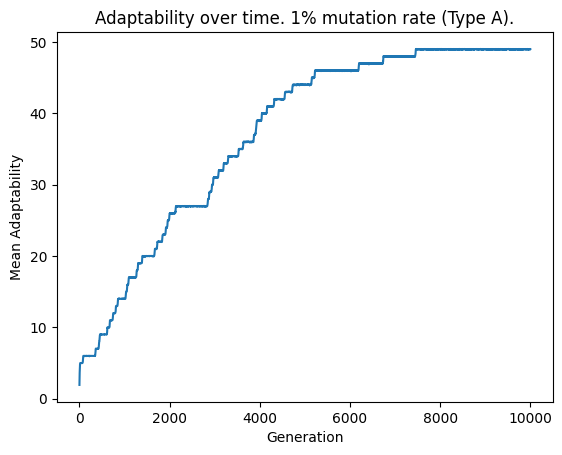

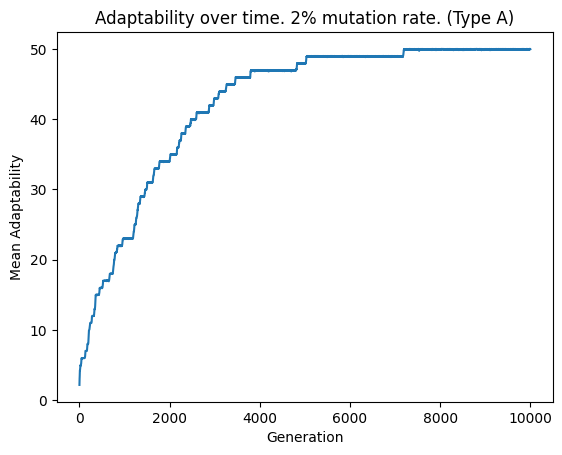

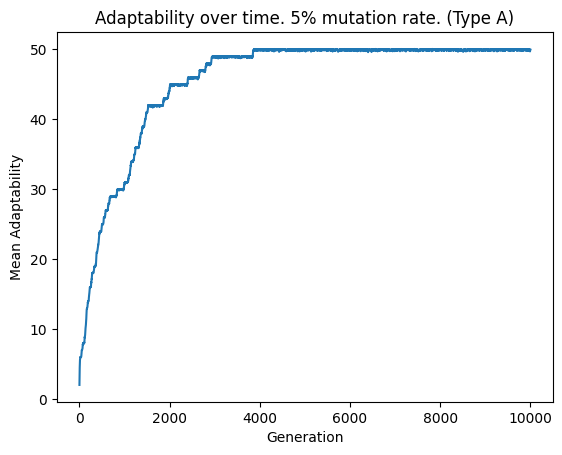

In [260]:
"""
Let us see how the model performs. let us experiment with different mutation rates and number of creatues.
"""
x = list(range(1, len(res0[0]) + 1))
y = res0[0]
plt.plot(x,y)

plt.title("Adaptability over time. 1% mutation rate (Type A).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

x = list(range(1, len(res1[0]) + 1))
y = res1[0]

plt.plot(x,y)

plt.title("Adaptability over time. 2% mutation rate. (Type A)")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

x = list(range(1, len(res2[0]) + 1))
y = res2[0]

plt.plot(x,y)

plt.title("Adaptability over time. 5% mutation rate. (Type A)")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

In [ ]:
"""
As we can see during the simulation the adaptability tends to increase quickly at first, but as time goes by the procces slows down
When "correct genes mutate". But by the law of big number with big enought population pool the presence of a large number of unmutated species
Prevents the population general adaptabily from decreasing. If we look closer we would be able to see that after reaching 50 adptability the line
is not exactly straight, there are some bumps, caused by mutation.

But so far we only looked at the situation when only one genome from the string mutates, it is not very realistic, now let us see what would 
happen if the logic would be not (determine whether genome mutates, choose 1 char to mutate) but char per char where we determine the mutation
Let us implement it and ofset the mutation chance to account for changed rules. Let us see what will happen.
"""

In [168]:
res0 = main_simulation(100,50,0.001,10000,1) 
res1 = main_simulation(100,50,0.01,10000,1)
res2 = main_simulation(100,50,0.02,10000,1)
res3 = main_simulation(100,50,0.05,10000,1)

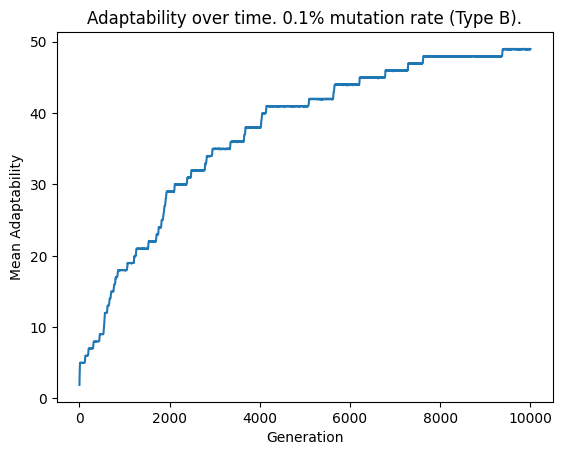

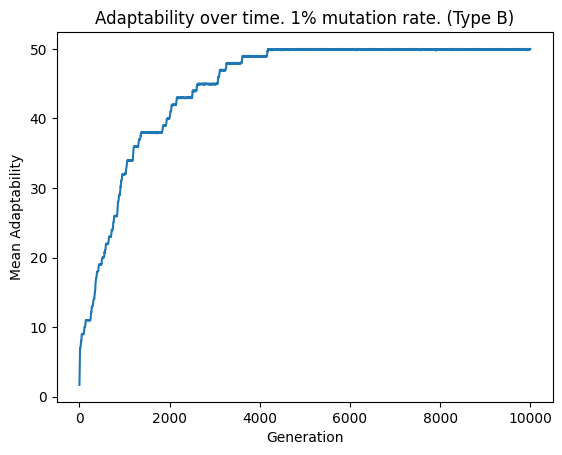

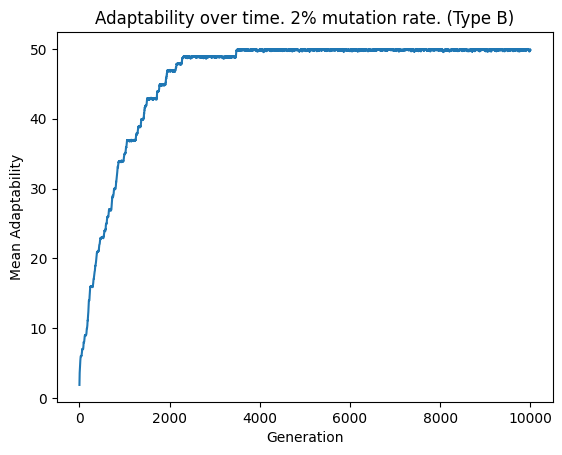

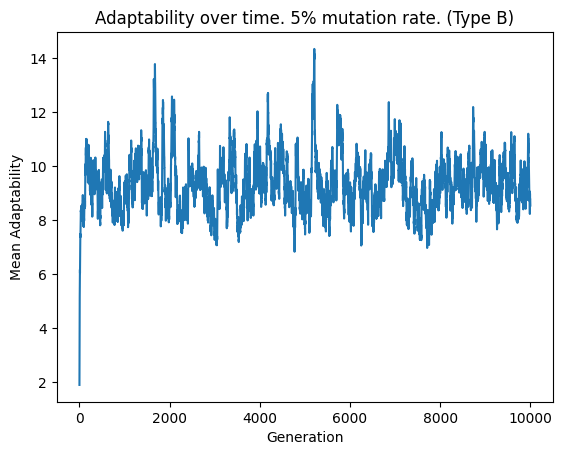

In [187]:
"""
Let us see how the model performs with updated values.
"""
x = list(range(1, len(res0[0]) + 1))
y = res0[0]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Type B).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

x = list(range(1, len(res1[0]) + 1))
y = res1[0]

plt.plot(x,y)

plt.title("Adaptability over time. 1% mutation rate. (Type B)")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

x = list(range(1, len(res2[0]) + 1))
y = res2[0]

plt.plot(x,y)

plt.title("Adaptability over time. 2% mutation rate. (Type B)")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

x = list(range(1, len(res3[0]) + 1))
y = res3[0]

plt.plot(x,y)

plt.title("Adaptability over time. 5% mutation rate. (Type B)")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

plt.show()

In [ ]:
"""
Now the results have chanded significantly, but adding a degree of realism, since mutations in our simulations are now closer to the real ones
They are more stochaistics and good distrbutions is maintained. Because all muataions of same small size are insufifient or our simulation.

At small probabilitiy of mutation we reach 50 adaptability pretty quickly as well, which is understandable, since nothing about the simulation 
changed fundamentally. But at a high mutation rate we can see that the population does not reach ideal genome, since they mutate to quickly ->
the problem from last part when negative mutations possibilities outweighted possitive mutations posibilites is hitting stronger at a higher mutation rate.

Note that from now own we will be using our Type B mutation. Aka character based mutation. 

Because Type B allows for mutations like "aab" -> "ddb", while also maintaining probabilitic distribution "aaa" -> "aab" is more likely then
"aaa" -> "abb". Type A is incapable of that. 
"""

Text(0, 0.5, 'Mean Adaptability')

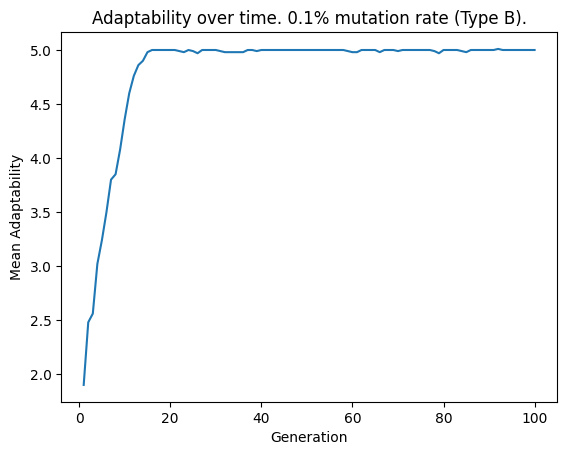

In [182]:
#Let us now look closer at the earlier stages for TypeB mutation. Chance 0.001 or 0.1% First 100 and 1000 generations to be precise

x = list(range(1, len(res0[0][0:100]) + 1))
y = res0[0][0:100]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Type B).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

Text(0, 0.5, 'Mean Adaptability')

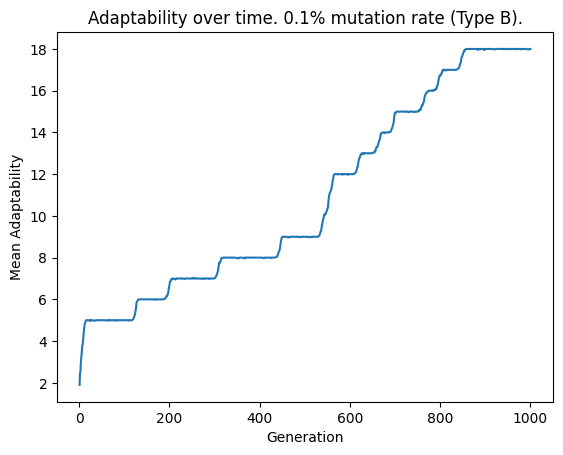

In [183]:
x = list(range(1, len(res0[0][0:1000]) + 1))
y = res0[0][0:1000]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Type B).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

In [ ]:
"""
We notice an interesting Step-based trend. This is most likely because of the fact that there are periods of statis when no new good mutations appear
Are changed by perioids of rapid development, where a more advanced scpeies quickly (mater of a few generations) overtakes the population.

As we can see the assexual reproduction model susecfully shows itself to be capable to evolve and develop given a static enviroment. Yet with more
creatures there model begins experiencing problems. If we have 2 creatures who both had different sucsesfull mutations paralely only one would
win. Previously I made a theoertical hypothesis that it could be fixed by making a sexual reproduction instewd of assexual where genome is mixxed between people.

To implement sexual reproduction we can reuse the onld existing code for the most part the only thing that is to be changed is reproduction methods
No to select mates the surviving population would randomly mate with each other.
"""

In [242]:
res0 = main_simulation(100,50,0.001,10000,1,1)  #sexual reproduction test 1

Text(0, 0.5, 'Mean Adaptability')

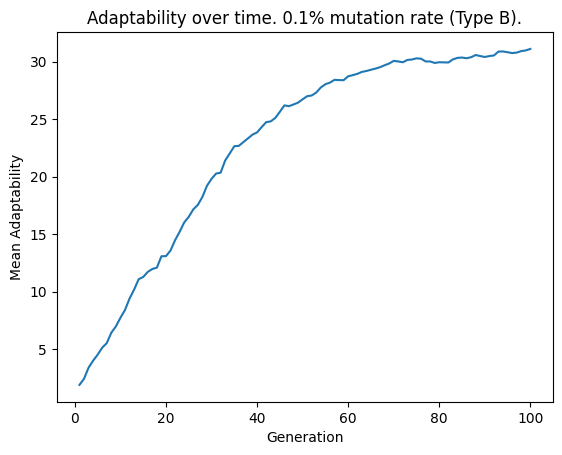

In [244]:
x = list(range(1, len(res0[0][0:100]) + 1))
y = res0[0][0:100]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Type B).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

Text(0, 0.5, 'Mean Adaptability')

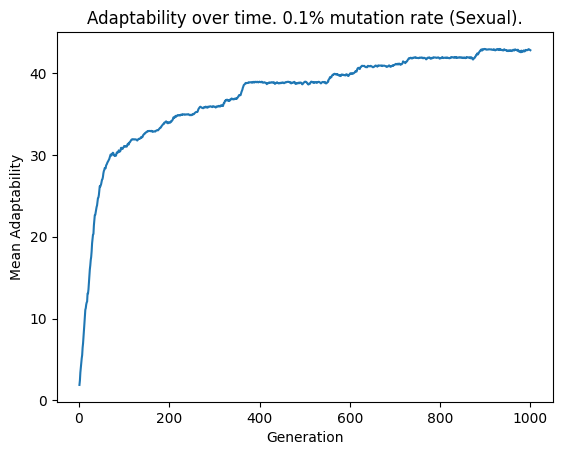

In [248]:
x = list(range(1, len(res0[0][0:1000]) + 1))
y = res0[0][0:1000]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Sexual).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

Text(0, 0.5, 'Mean Adaptability')

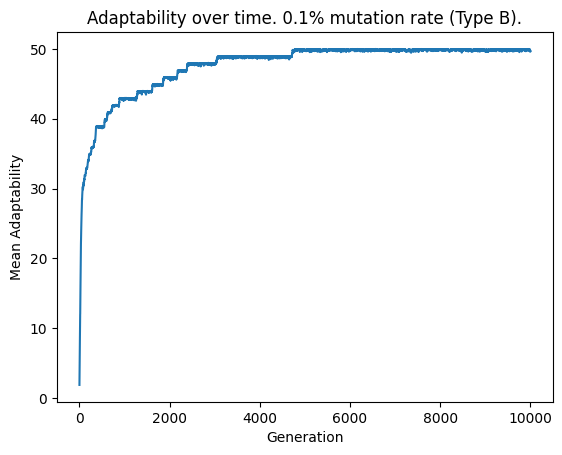

In [247]:
x = list(range(1, len(res0[0][0:10000]) + 1))
y = res0[0][0:10000]
plt.plot(x,y)

plt.title("Adaptability over time. 0.1% mutation rate (Type B).")
plt.xlabel("Generation")
plt.ylabel("Mean Adaptability")

In [ ]:
"""
In the short run the results are AMAZING for sexual reprroduction. By generation 1000 assexual adaptability was only around
18/50 whilist sexual reproduction already made it to 40/50 adaptability. Also the rise is now more gradual. 

In long term sexual reproduction on the other hand has slowed down. This is not as bad since in real life the enviroment is dynamic and
it is important to catch up to the change quickly rather then idealizing one particular static setup.
"""

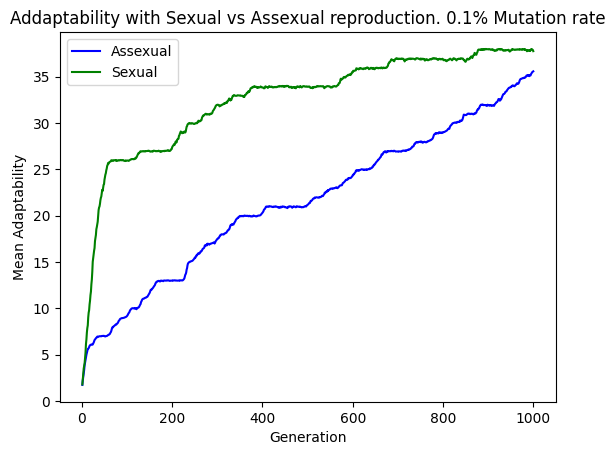

In [267]:
res0 = main_simulation(100,50,0.001,1000,1,0)  #assexual 
res1 = main_simulation(100,50,0.001,1000,1,1)  #sexual

x = list(range(1, len(res0[0][0:1000]) + 1))
y1 = res0[0][0:1000]
y2 = res1[0][0:1000]

plt.plot(x, y1, label='Assexual', color='blue')
plt.plot(x, y2, label='Sexual', color='green')

plt.title('Addaptability with Sexual vs Assexual reproduction. 0.1% Mutation rate')
plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

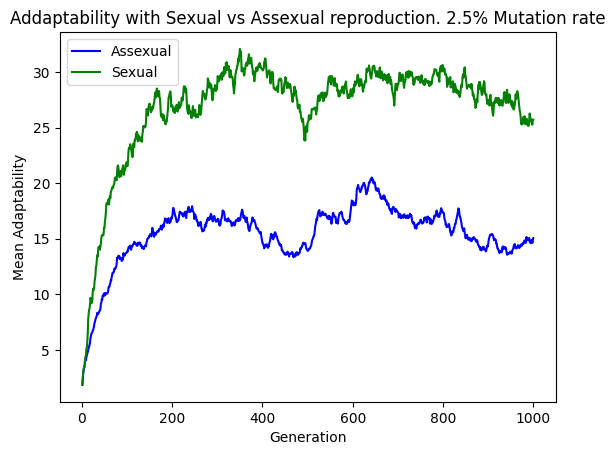

In [271]:
#Let us raise the mutation rate to see how well sexual vs asexual perform on it
res0 = main_simulation(100,50,0.025,1000,1,0)  #assexual 
res1 = main_simulation(100,50,0.025,1000,1,1)  #sexual

x = list(range(1, len(res0[0][0:1000]) + 1))
y1 = res0[0][0:1000]
y2 = res1[0][0:1000]

plt.plot(x, y1, label='Assexual', color='blue')
plt.plot(x, y2, label='Sexual', color='green')

plt.title('Addaptability with Sexual vs Assexual reproduction. 2.5% Mutation rate')
plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

In [ ]:
#As we can see sexual reprdocuction can deal with overly high mutation rate significantly better. Althout it is hard for it as well.

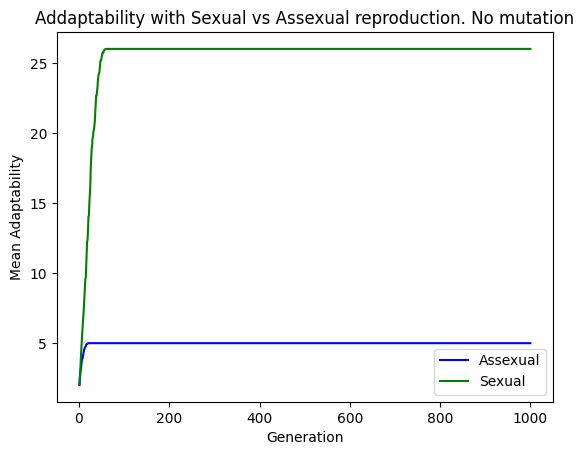

In [274]:
#Let us disable mutation now
res0 = main_simulation(100,50,0.0,1000,-1,0)  #assexual 
res1 = main_simulation(100,50,0.0,1000,-1,1)  #sexual

x = list(range(1, len(res0[0][0:1000]) + 1))
y1 = res0[0][0:1000]
y2 = res1[0][0:1000]

plt.plot(x, y1, label='Assexual', color='blue')
plt.plot(x, y2, label='Sexual', color='green')

plt.title('Addaptability with Sexual vs Assexual reproduction. No mutation')
plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

In [ ]:
"""
Here we can see a curious picture. Both creatures reproducing sexualy and creatures reproducing assexually start at the same footing,
but whilist the assexuals only managed to create their dominant gene as direct and unchanged sussesor of one of the inital generated creatures.
The sexually reproducing creatures managed to combine ALL the martial they were starting with to develop a SIGNIFICANTLY more addaptive genome

Yet with no mutations the evolution came to a halt.
"""

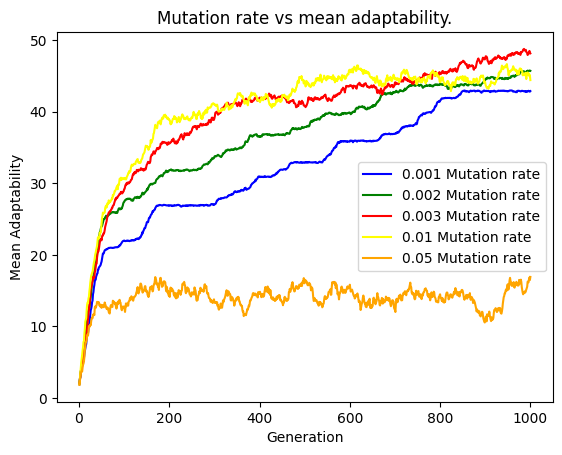

In [256]:
#Now experiments with different mutation rates on same graph
res0 = main_simulation(100,50,0.001,1000,1,1)  
res1 = main_simulation(100,50,0.002,1000,1,1)
res2 = main_simulation(100,50,0.005,1000,1,1)
res3 = main_simulation(100,50,0.01,1000,1,1)
res4 = main_simulation(100,50,0.05,1000,1,1)

x = list(range(1, len(res0[0][0:1000]) + 1))

y1 = res0[0][0:1000]
y2 = res1[0][0:1000]
y3 = res2[0][0:1000]
y4 = res3[0][0:1000]
y5 = res4[0][0:1000]

plt.plot(x, y1, label='0.001 Mutation rate', color='blue')
plt.plot(x, y2, label='0.002 Mutation rate', color='green')
plt.plot(x, y3, label='0.003 Mutation rate', color='red')
plt.plot(x, y4, label='0.01 Mutation rate', color='yellow')
plt.plot(x, y5, label='0.05 Mutation rate', color='orange')


plt.title('Mutation rate vs mean adaptability.')
plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

In [ ]:
"""
On the notion of genders.

As we can see in our simulatiuon there is no genders everyone can mate with everyone. (Brave New Wourld)
This makes sence and beggs a question why there are genders in real life for most of the aminals.
Except for some hemarphoridic spoecies (some worms species are an example of such. Lumbricus earth worms).

The reason lies in the fact that it is expenive for creatures to hold a complete set of reproductive organs
So specialisation appears, which later becomes gender. It allows for an even quicker evolution since now
mating selection is more quick and does not rely solely on the enviroment, also it takes less energy
and allows specialisation of genders.

In my project at the start there will be no genders, but my hope is that by the interaction with the enviroment 
Creatures would naturally evolve into having them. There would be many "Contruction pieces" in the final project
Which would result in many potentially interesting possibilities.
"""

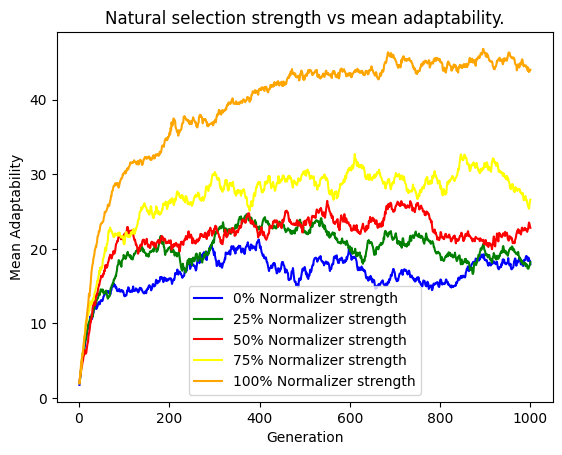

In [266]:
"""
Strength of Natural Selection
During the early stages of the project we were normalizing adaptability, yet it might be interest to see what would happen if
natural selection was more weakly/strongly incilded towards survival of the fittest. Let us add yet another parameter to our model to check 
it out.
"""
res0 = main_simulation(100,50,0.01,1000,1,1,0.0)  
res1 = main_simulation(100,50,0.01,1000,1,1,0.25)
res2 = main_simulation(100,50,0.01,1000,1,1,0.5)
res3 = main_simulation(100,50,0.01,1000,1,1,0.75)
res4 = main_simulation(100,50,0.01,1000,1,1,1.0)

x = list(range(1, len(res0[0][0:1000]) + 1))

y1 = res0[0][0:1000]
y2 = res1[0][0:1000]
y3 = res2[0][0:1000]
y4 = res3[0][0:1000]
y5 = res4[0][0:1000]

plt.plot(x, y1, label='0% Normalizer strength', color='blue')
plt.plot(x, y2, label='25% Normalizer strength', color='green')
plt.plot(x, y3, label='50% Normalizer strength', color='red')
plt.plot(x, y4, label='75% Normalizer strength', color='yellow')
plt.plot(x, y5, label='100% Normalizer strength', color='orange')


plt.title('Natural selection strength vs mean adaptability.')
plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

In [ ]:
"""
Without normalisation more fit creatures do not perform as well since. 21 22 23 24 are almoast the same, whilist 1 2 3 4 
are not. (From a ratio point of view). 1/4 = 0.25, Whilist 21/24 = 0.875. 
"""

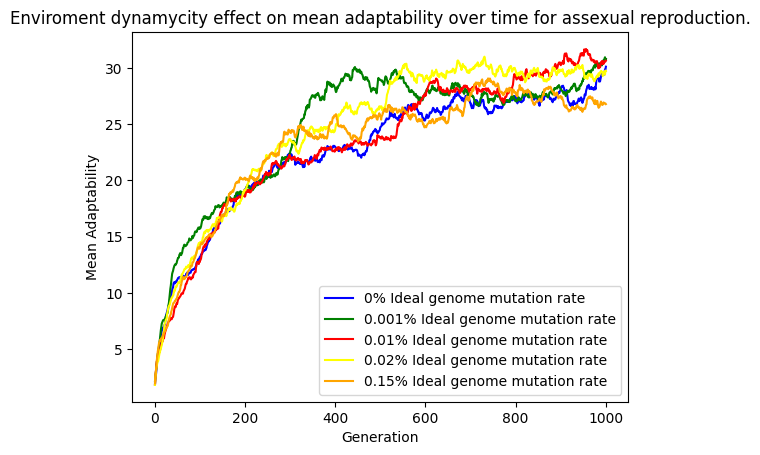

In [285]:
res0 = main_simulation(100,50,0.01,1000,1,0,1.0,0.0)  
res1 = main_simulation(100,50,0.01,1000,1,0,1.0,0.001)
res2 = main_simulation(100,50,0.01,1000,1,0,1.0,0.01)
res3 = main_simulation(100,50,0.01,1000,1,0,1.0,0.02)
res4 = main_simulation(100,50,0.01,1000,1,0,1.0,0.15)

x = list(range(1, len(res0[0][0:1000]) + 1))

y1 = res0[0][0:1000]
y2 = res1[0][0:1000]
y3 = res2[0][0:1000]
y4 = res3[0][0:1000]
y5 = res4[0][0:1000]

plt.plot(x, y1, label='0% Ideal genome mutation rate', color='blue')
plt.plot(x, y2, label='0.001% Ideal genome mutation rate', color='green')
plt.plot(x, y3, label='0.01% Ideal genome mutation rate', color='red')
plt.plot(x, y4, label='0.02% Ideal genome mutation rate', color='yellow')
plt.plot(x, y5, label='0.15% Ideal genome mutation rate', color='orange')


plt.title('Enviroment dynamycity effect on mean adaptability over time for assexual reproduction.')

plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

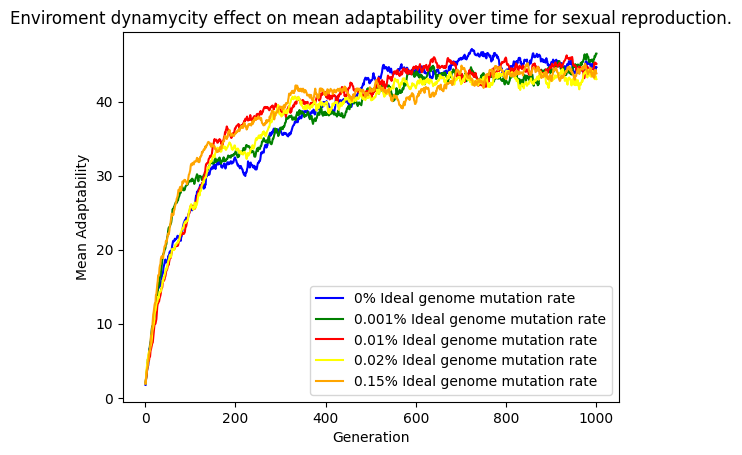

In [284]:
"""
Now there is yet one more experiment I would like to do. In the underlying phylosoply of my project lies the convept of dynamic
enviroment. Let us see how would creatures behave if suddenly the ideal enviroment would also change.
"""
res0 = main_simulation(100,50,0.01,1000,1,1,1.0,0.0)  
res1 = main_simulation(100,50,0.01,1000,1,1,1.0,0.001)
res2 = main_simulation(100,50,0.01,1000,1,1,1.0,0.01)
res3 = main_simulation(100,50,0.01,1000,1,1,1.0,0.02)
res4 = main_simulation(100,50,0.01,1000,1,1,1.0,0.15)

x = list(range(1, len(res0[0][0:1000]) + 1))

y1 = res0[0][0:1000]
y2 = res1[0][0:1000]
y3 = res2[0][0:1000]
y4 = res3[0][0:1000]
y5 = res4[0][0:1000]

plt.plot(x, y1, label='0% Ideal genome mutation rate', color='blue')
plt.plot(x, y2, label='0.001% Ideal genome mutation rate', color='green')
plt.plot(x, y3, label='0.01% Ideal genome mutation rate', color='red')
plt.plot(x, y4, label='0.02% Ideal genome mutation rate', color='yellow')
plt.plot(x, y5, label='0.15% Ideal genome mutation rate', color='orange')


plt.title('Enviroment dynamycity effect on mean adaptability over time for sexual reproduction.')

plt.xlabel('Generation')
plt.ylabel('Mean Adaptability')

plt.legend()
plt.show()

In [ ]:
#As we can see sexual reproduction allows for greater enviromental adaptability.

In [ ]:
"""
In conclusion
During this devlog I have started working on practical implementation of genome for my simulation. I have created most of the methods that
I will use in the future. Also I have conducted some research with basic reproduction simulation, which allowed me to confirm my hypothesis
from last 2 reports as well as gain a practical understand of rules of the evolution.

In the next report I am planning to futher develop the genome. Right now I have developed everything, besides the content of it (all the
surrounding methods/instrument). In the next log I will actually deterime how the genome would be structured in it's final form. Plus answer 
the questions of what and how it would operate in the final project.

P.S
I do apologize for slowing down the speed of development, but the projected turned out to be much more complex then ititaly anticipated.
"""

In [31]:
"""
Reference & Bibliography

1.https://stackoverflow.com/questions/2257441/random-string-generation-with-upper-case-letters-and-digits

2.https://www.geeksforgeeks.org/count-the-number-of-matching-characters-in-a-pair-of-strings/

3.https://en.wikipedia.org/wiki/Lumbricus_terrestris
"""

'\nReference & Bibliography\n\n1.https://stackoverflow.com/questions/2257441/random-string-generation-with-upper-case-letters-and-digits\n\n'